In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats

# random sample consimment between runs
import random
# set random seed
random.seed(10)


%matplotlib inline



In [8]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)

    
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)


In [9]:

for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

omc_it_mm_all = pd.concat(omc_it_mm)
omc_it_st_all = pd.concat(omc_it_st)

omc_pt_mm_all = pd.concat(omc_pt_mm)
omc_pt_st_all = pd.concat(omc_pt_st)

# Example Lab mouse

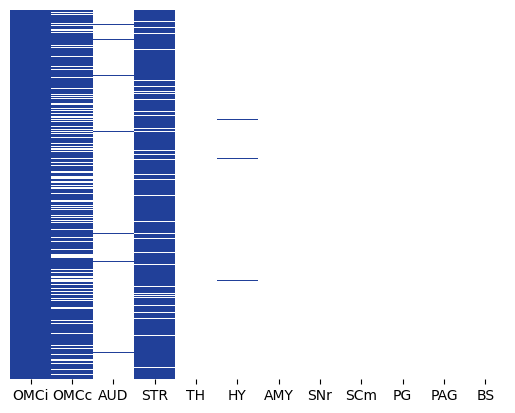

In [5]:
plot = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

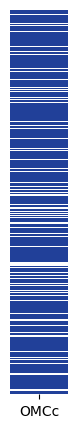

In [7]:
# just plot OMCc
area = 'OMCc'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"mm_omcc_heatmap.jpeg", dpi=300, bbox_inches="tight")


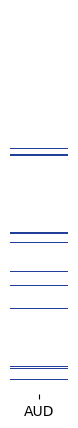

In [9]:
area = 'AUD'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"mm_aud_heatmap.jpeg", dpi=300, bbox_inches="tight")


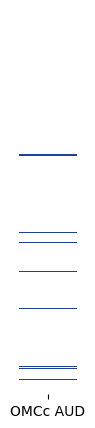

In [10]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm_all.sample(1000, random_state=10).reset_index(drop=True)
sample
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"mm_aud_x_omcc_heatmap.jpeg", dpi=300, bbox_inches="tight")


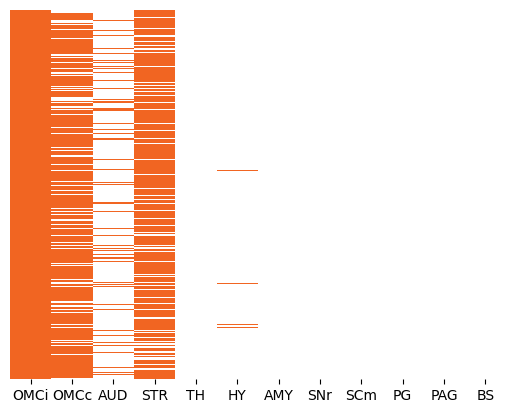

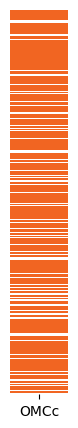

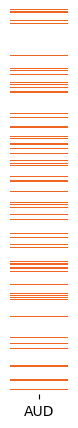

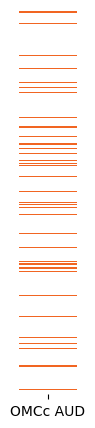

In [11]:
plot = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

# just plot OMCc
area = 'OMCc'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"st_omcc_heatmap.jpeg", dpi=300, bbox_inches="tight")

# plot aud
area = 'AUD'
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
plot = pd.DataFrame(sample[area])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"st_aud_heatmap.jpeg", dpi=300, bbox_inches="tight")


# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st_all.sample(1000, random_state=10).reset_index(drop=True)
sample
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(out_path+"st_aud_x_omcc_heatmap.jpeg", dpi=300, bbox_inches="tight")


# example lab mouse

In [ ]:
plot = omc_it_mm[1]

sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]['OMCc']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]['AUD']
# aud_omc = sample['OMCc'] + sample['AUD']
# both = aud_omc == 2
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

In [ ]:
# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_mm[1]
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=blue_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

# example steg


In [ ]:
plot = omc_it_st[1]
#plot all
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot omcc intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]['OMCc']
plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]['AUD']

plot = pd.DataFrame(sample)
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

# plot omcc/aud intersect
fig = plt.subplots(figsize=(0.75,5))
sample = omc_it_st[1]
aud_omc = sample['OMCc'] + sample['AUD']
both = aud_omc == 2
plot = pd.DataFrame(both, columns=['OMCc AUD'])
sns.heatmap(plot, cmap=orange_cmp, cbar=False)
# plt.gca().get_yaxis().set_visible(False)

## obs vs. expected

In [10]:
def calc_overlap(df, area1='OMCc', area2='AUD'):
    combination = df[area1] + df[area2]
    overlap = combination == 2
    return(pd.DataFrame(overlap, columns=[area1 + ' ' + area2]))

In [11]:
overlap_df = pd.DataFrame(columns=["OMCc_AUD_obs", "obs_prop", "calc_prop", "total", "OMCc_tot", "AUD_tot", "Species", "Mouse", "Dataset"])

for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    overlap = calc_overlap(df).sum()[0]
    omcc = (df["OMCc"] > 0).sum()
    aud = (df["AUD"] > 0).sum()
    obs_prop = overlap/df.shape[0]
    calc_proportion = (omcc/df.shape[0]) * (aud/df.shape[0])
    overlap_df.loc[len(overlap_df.index)] = [overlap, obs_prop, calc_proportion, df.shape[0], omcc, aud, "MMus", mice_mm[i], dataset_mm[i]]
    
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    overlap = calc_overlap(df).sum()[0]
    omcc = (df["OMCc"] > 0).sum()
    aud = (df["AUD"] > 0).sum()
    obs_prop = overlap/df.shape[0]
    calc_proportion = (omcc/df.shape[0]) * (aud/df.shape[0])
    overlap_df.loc[len(overlap_df.index)] = [overlap, obs_prop, calc_proportion, df.shape[0], omcc, aud, "STeg", mice_st[i], dataset_st[i]]

overlap_df

,OMCc_AUD_obs,obs_prop,calc_prop,total,OMCc_tot,AUD_tot,Species,Mouse,Dataset
0,105,0.012607,0.009457,8329,5607,117,MMus,MMM1,M194
1,669,0.051190,0.040913,13069,9040,773,MMus,MMF2,M194
2,306,0.026257,0.023327,11654,8975,353,MMus,MMF3,M194
3,658,0.126441,0.117295,5204,4474,710,MMus,MMM4,M220
4,128,0.008386,0.008489,15264,13641,145,MMus,MMF5,M220
5,43,0.079926,0.090764,538,417,63,STeg,STM1,M194
6,24,0.053097,0.097737,452,312,64,STeg,STM2,M194
7,11,0.034700,0.065758,317,236,28,STeg,STF3,M194
8,61,0.090370,0.096577,675,557,79,STeg,STF4,M220
9,32,0.083990,0.089528,381,361,36,STeg,STM5,M220


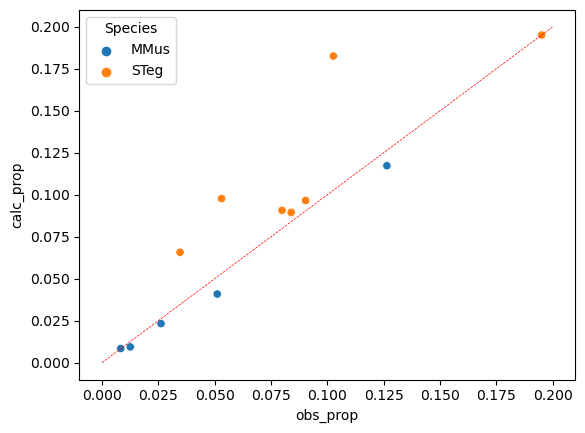

In [15]:
# plot obs vs expected
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(overlap_df, x="obs_prop", y="calc_prop", hue="Species")
plt.savefig(out_path+"obs_calc_indp_st_mm.jpeg", dpi=300, bbox_inches="tight")


In [ ]:
# just plot mmus
idx = overlap_df['Species'] == "MMus"
plot = overlap_df[idx]
dot = plot.iloc[1,:].to_frame().transpose()
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(plot, x="obs_prop", y="calc_prop", color="black")
sns.scatterplot(dot, x='obs_prop', y='calc_prop')
plt.title("MMus")

In [ ]:
# just plot steg
idx = overlap_df['Species'] == "STeg"
plot = overlap_df[idx]
dot = plot.iloc[1,:].to_frame().transpose()
x = np.linspace(0,0.2, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
sns.scatterplot(plot, x="obs_prop", y="calc_prop", color="black")
sns.scatterplot(dot, x='obs_prop', y='calc_prop', color="orange")
plt.title("STeg")

# dot plot

In [ ]:
# mmus = overlap_df[overlap_df["Species"] == "MMus"]
# steg = overlap_df[overlap_df["Species"] == "STeg"]
plot = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', hue='Species', units="Mouse", estimator=None, 
             marker='o', alpha=0.75)
plt.xlabel("Observed v Expected")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



In [ ]:
# just plot mmus
mmus = overlap_df[overlap_df['Species']=="MMus"]
df = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
idx = df['Species'] == "MMus"
plot = df[idx]
dot = mmus.iloc[1,:].to_frame().transpose()
dot_p = pd.melt(dot, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', alpha=0.75, color='black')
sns.lineplot(dot_p, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', color='blue')
plt.xlabel("Observed v Expected")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("MMus")

In [ ]:
# just plot mmus
steg = overlap_df[overlap_df['Species']=="STeg"]
df = pd.melt(overlap_df, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
idx = df['Species'] == "STeg"
plot = df[idx]
dot = steg.iloc[1,:].to_frame().transpose()
dot_p = pd.melt(dot, id_vars=['Mouse', 'Species', 'Dataset'], value_vars=['obs_prop', 'calc_prop'],
        var_name='o_v_e', value_name='proportion')
sns.lineplot(plot, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', alpha=0.75, color='black')
sns.lineplot(dot_p, x="o_v_e", y='proportion', units="Mouse", estimator=None, 
             marker='o', color='orange')
plt.xlabel("Observed v Expected")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("STeg")

# Node plots

In [12]:
# all it cells - summary combine all cells from each species
# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_all)
print(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_all)
print(node_proportion_st)

MMus
1.0    0.302055
2.0    0.665433
3.0    0.032511
dtype: float64


STeg
1.0    0.287466
2.0    0.638692
3.0    0.073842
dtype: float64


Text(0.5, 1.0, 'IT Cells')

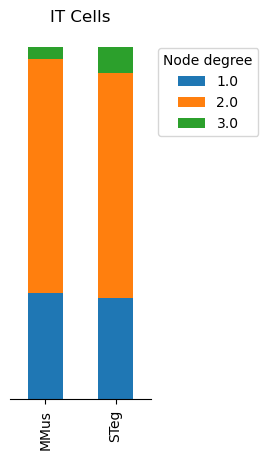

In [18]:
plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT Cells")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300

In [13]:
# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it

Text(0.5, 1.0, 'IT, node degree=1')

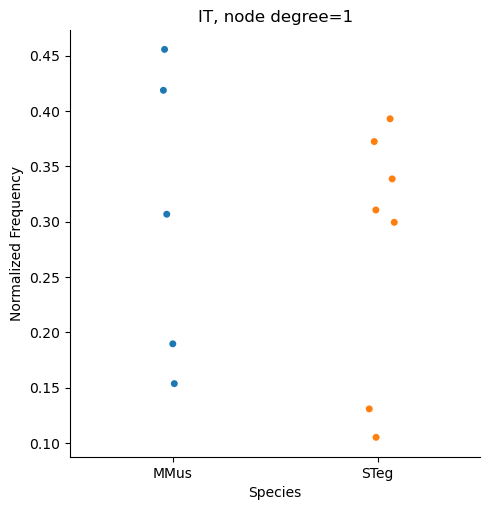

In [20]:
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT, node degree=1")

In [14]:
# AUD

# isolate aud cells
omc_it_mm_aud = []
for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    aud = df[df['AUD']>0]
    omc_it_mm_aud.append(aud)

omc_it_mm_aud_all = pd.concat(omc_it_mm_aud)

omc_it_st_aud = []
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    aud = df[df['AUD']>0]
    omc_it_st_aud.append(aud)

omc_it_st_aud_all = pd.concat(omc_it_st_aud)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_aud_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_aud_all, drop=['OMCi'])
display(node_proportion_st)


MMus


1.0    0.025262
2.0    0.145853
3.0    0.828885
dtype: float64



STeg


1.0    0.204301
2.0    0.310036
3.0    0.485663
dtype: float64

Text(0.5, 1.0, 'IT AUD')

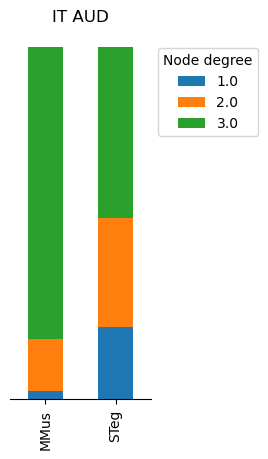

In [22]:
plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT AUD")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


Text(0.5, 1.0, 'IT AUD, node degree=1')

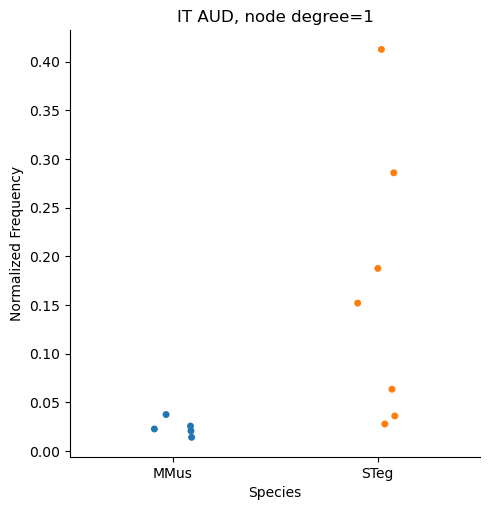

In [15]:

# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm_aud, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st_aud, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT AUD, node degree=1")

# OMCc

MMus


1.0    0.114143
2.0    0.844167
3.0    0.041690
dtype: float64



STeg


1.0    0.166389
2.0    0.743581
3.0    0.090030
dtype: float64

Text(0.5, 1.0, 'IT OMCc, node degree=1')

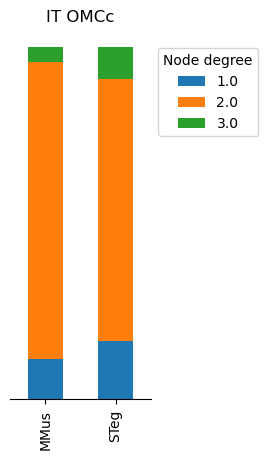

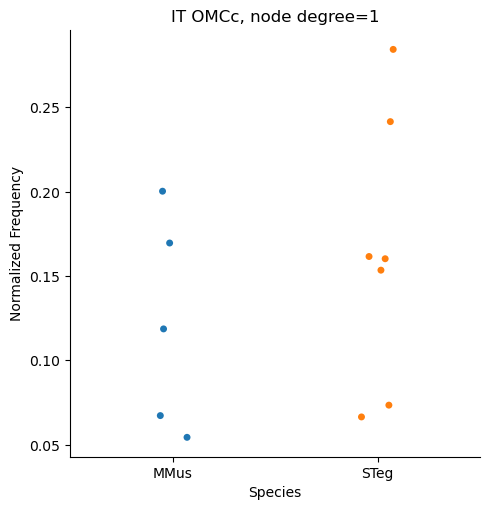

In [16]:
# OMCc

# isolate omcc cells
omc_it_mm_omcc = []
for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    omcc = df[df['OMCc']>0]
    omc_it_mm_omcc.append(omcc)

omc_it_mm_omcc_all = pd.concat(omc_it_mm_omcc)

omc_it_st_omcc = []
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    omcc = df[df['OMCc']>0]
    omc_it_st_omcc.append(omcc)

omc_it_st_omcc_all = pd.concat(omc_it_st_omcc)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_omcc_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_omcc_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT OMCc")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm_omcc, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st_omcc, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT OMCc, node degree=1")

MMus


1.0    0.233602
2.0    0.730576
3.0    0.035822
dtype: float64



STeg


1.0    0.148435
2.0    0.760350
3.0    0.091215
dtype: float64

Text(0.5, 1.0, 'IT STR, node degree=1')

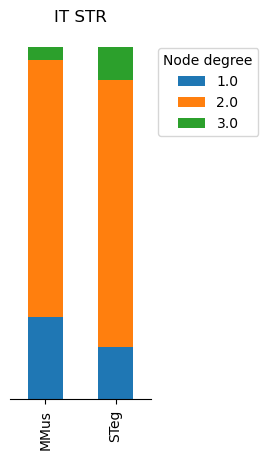

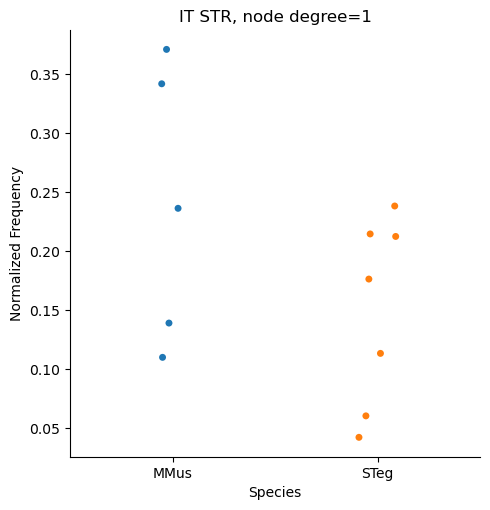

In [25]:
# STR

# isolate str cells
omc_it_mm_str = []
for i in range(len(omc_it_mm)):
    df = omc_it_mm[i]
    str = df[df['STR']>0]
    omc_it_mm_str.append(str)

omc_it_mm_str_all = pd.concat(omc_it_mm_str)

omc_it_st_str = []
for i in range(len(omc_it_st)):
    df = omc_it_st[i]
    str = df[df['STR']>0]
    omc_it_st_str.append(str)

omc_it_st_str_all = pd.concat(omc_it_st_str)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_it_mm_str_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_it_st_str_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("IT STR")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_it_mm_str, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_it_st_str, drop=['OMCi'], species='STeg')
nodes_it = pd.concat([nodes_mm, nodes_st])
# nodes_it
plot = nodes_it[nodes_it["Node Degree"]==1]
sns.catplot(plot, x="Species", y="Normalized Frequency", hue="Species")
plt.title("IT STR, node degree=1")

# PT cells

MMus


2.0     0.002013
3.0     0.016779
4.0     0.041611
5.0     0.140940
6.0     0.297987
7.0     0.409396
8.0     0.086577
9.0     0.004027
10.0    0.000671
dtype: float64



STeg


1.0     0.004630
2.0     0.004630
3.0     0.034722
4.0     0.078704
5.0     0.120370
6.0     0.236111
7.0     0.263889
8.0     0.173611
9.0     0.071759
10.0    0.011574
dtype: float64

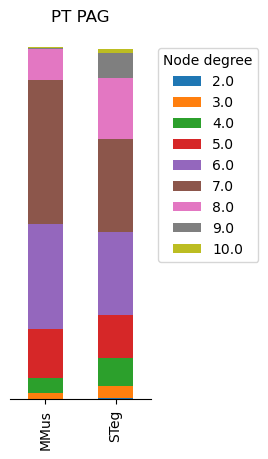

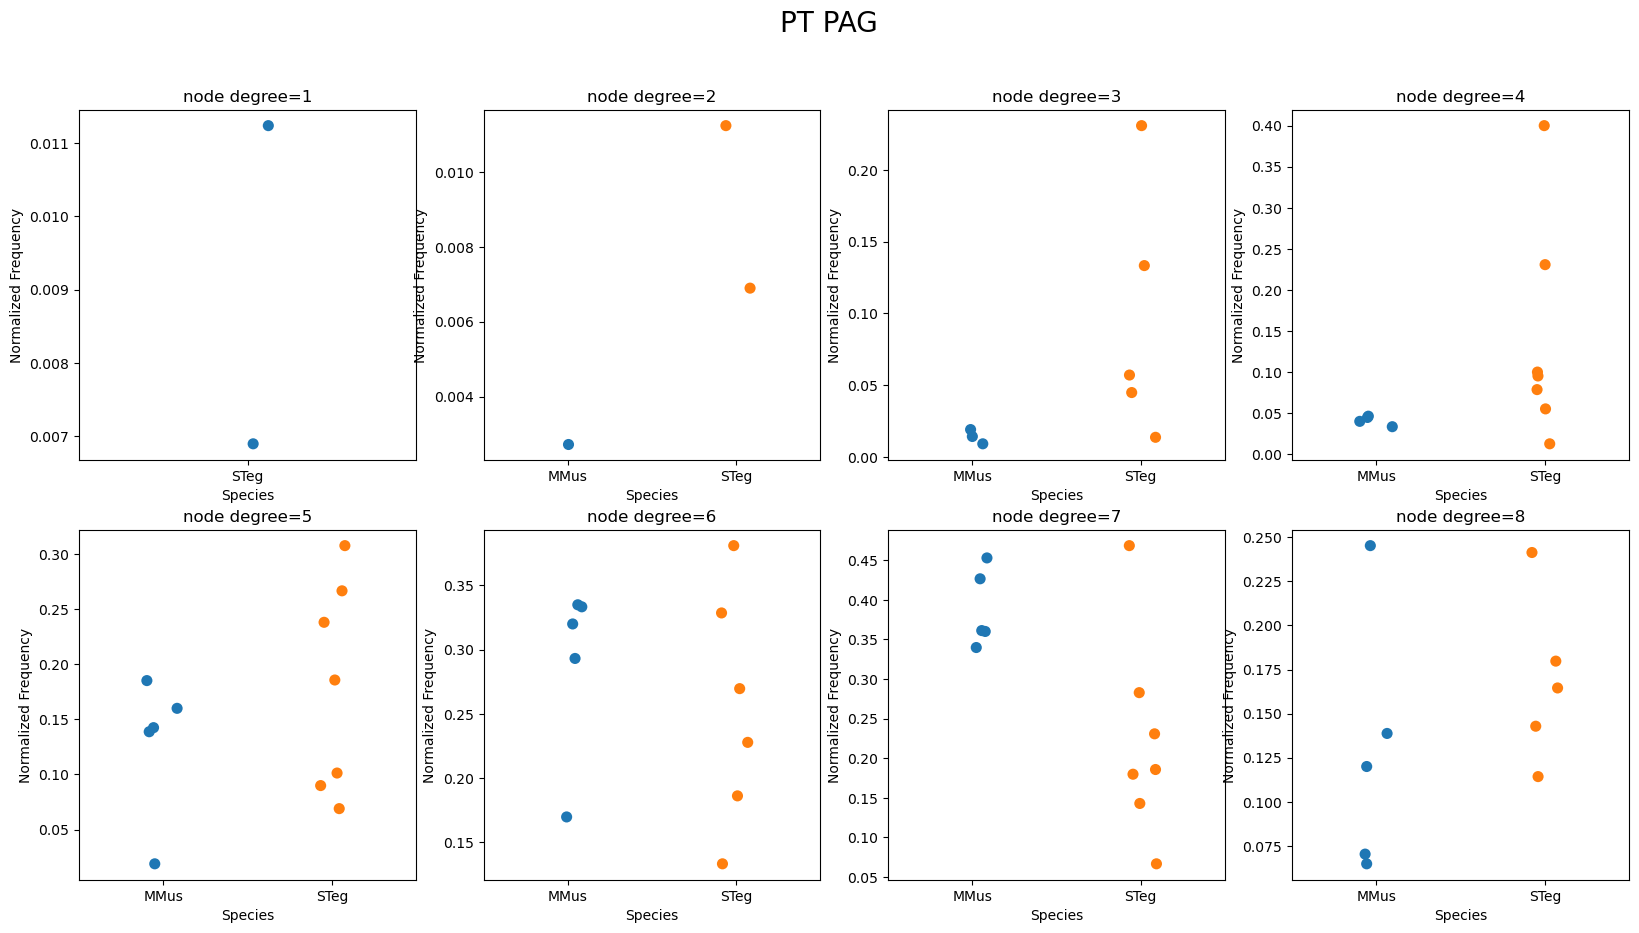

In [17]:
# PAG

# isolate pag cells
omc_pt_mm_pag = []
for i in range(len(omc_pt_mm)):
    df = omc_pt_mm[i]
    pag = df[df['PAG']>0]
    omc_pt_mm_pag.append(pag)

omc_pt_mm_pag_all = pd.concat(omc_pt_mm_pag)

omc_pt_st_pag = []
for i in range(len(omc_pt_st)):
    df = omc_pt_st[i]
    pag = df[df['PAG']>0]
    omc_pt_st_pag.append(pag)

omc_pt_st_pag_all = pd.concat(omc_pt_st_pag)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_pt_mm_pag_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_pt_st_pag_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("PT PAG")
plt.savefig(out_path+"mm_st_pag_nodestack.jpeg", dpi=300, bbox_inches="tight")


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_pt_mm_pag, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_pt_st_pag, drop=['OMCi'], species='STeg')
nodes_pt = pd.concat([nodes_mm, nodes_st])
# nodes_pt

fig, axs = plt.subplots(2,4, figsize=(20,10))
i=1
for ax in axs.flat:
    plot = nodes_pt[nodes_pt["Node Degree"]==i]
    sns.stripplot(plot, x="Species", y="Normalized Frequency", hue="Species", 
                  ax=ax, legend=False, size=8)
    ax.set_title("node degree="+str(i))
    i+=1
fig.suptitle("PT PAG", size=20)
plt.savefig(out_path+"mm_st_pag_nodedots.jpeg", dpi=300, bbox_inches="tight")

MMus


1.0    0.007999
2.0    0.072133
3.0    0.189259
4.0    0.293958
5.0    0.244679
6.0    0.151264
7.0    0.036566
8.0    0.004142
dtype: float64



STeg


1.0    0.033058
2.0    0.148760
3.0    0.322314
4.0    0.247934
5.0    0.115702
6.0    0.099174
7.0    0.020661
8.0    0.010331
9.0    0.002066
dtype: float64

Text(0.5, 0.98, 'PT Non-PAG')

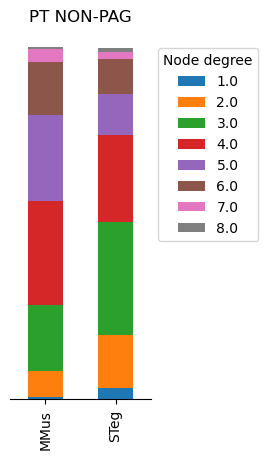

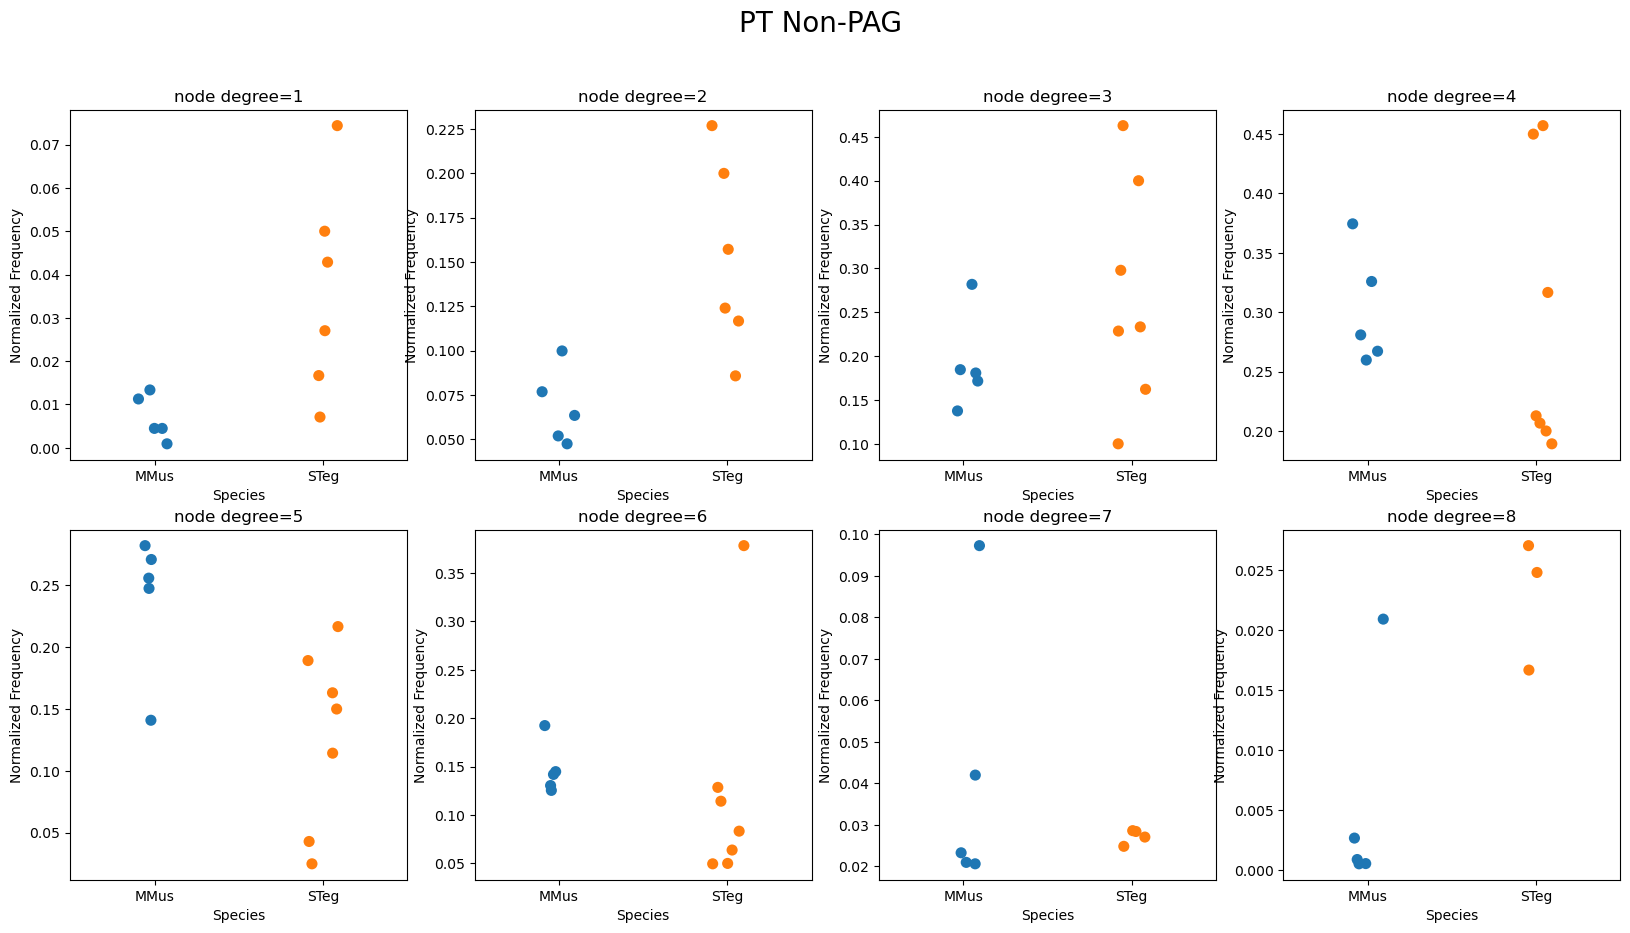

In [29]:
# non-pag (npag) pt cells
# PAG

# isolate npag cells
omc_pt_mm_npag = []
for i in range(len(omc_pt_mm)):
    df = omc_pt_mm[i]
    npag = df[~(df['PAG']>0)]
    omc_pt_mm_npag.append(npag)

omc_pt_mm_npag_all = pd.concat(omc_pt_mm_npag)

omc_pt_st_npag = []
for i in range(len(omc_pt_st)):
    df = omc_pt_st[i]
    npag = df[~(df['PAG']>0)]
    omc_pt_st_npag.append(npag)

omc_pt_st_npag_all = pd.concat(omc_pt_st_npag)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_pt_mm_npag_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_pt_st_npag_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("PT NON-PAG")
# plt.savefig(out_path+"mm_st_stack.jpeg", dpi=300


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_pt_mm_npag, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_pt_st_npag, drop=['OMCi'], species='STeg')
nodes_pt = pd.concat([nodes_mm, nodes_st])
# nodes_pt

fig, axs = plt.subplots(2,4, figsize=(20,10))
i=1
for ax in axs.flat:
    plot = nodes_pt[nodes_pt["Node Degree"]==i]
    sns.stripplot(plot, x="Species", y="Normalized Frequency", hue="Species", 
                  ax=ax, legend=False, size=8)
    ax.set_title("node degree="+str(i))
    i+=1
fig.suptitle("PT Non-PAG", size=20)

Text(0.5, 0.98, 'PT PAG Cells')

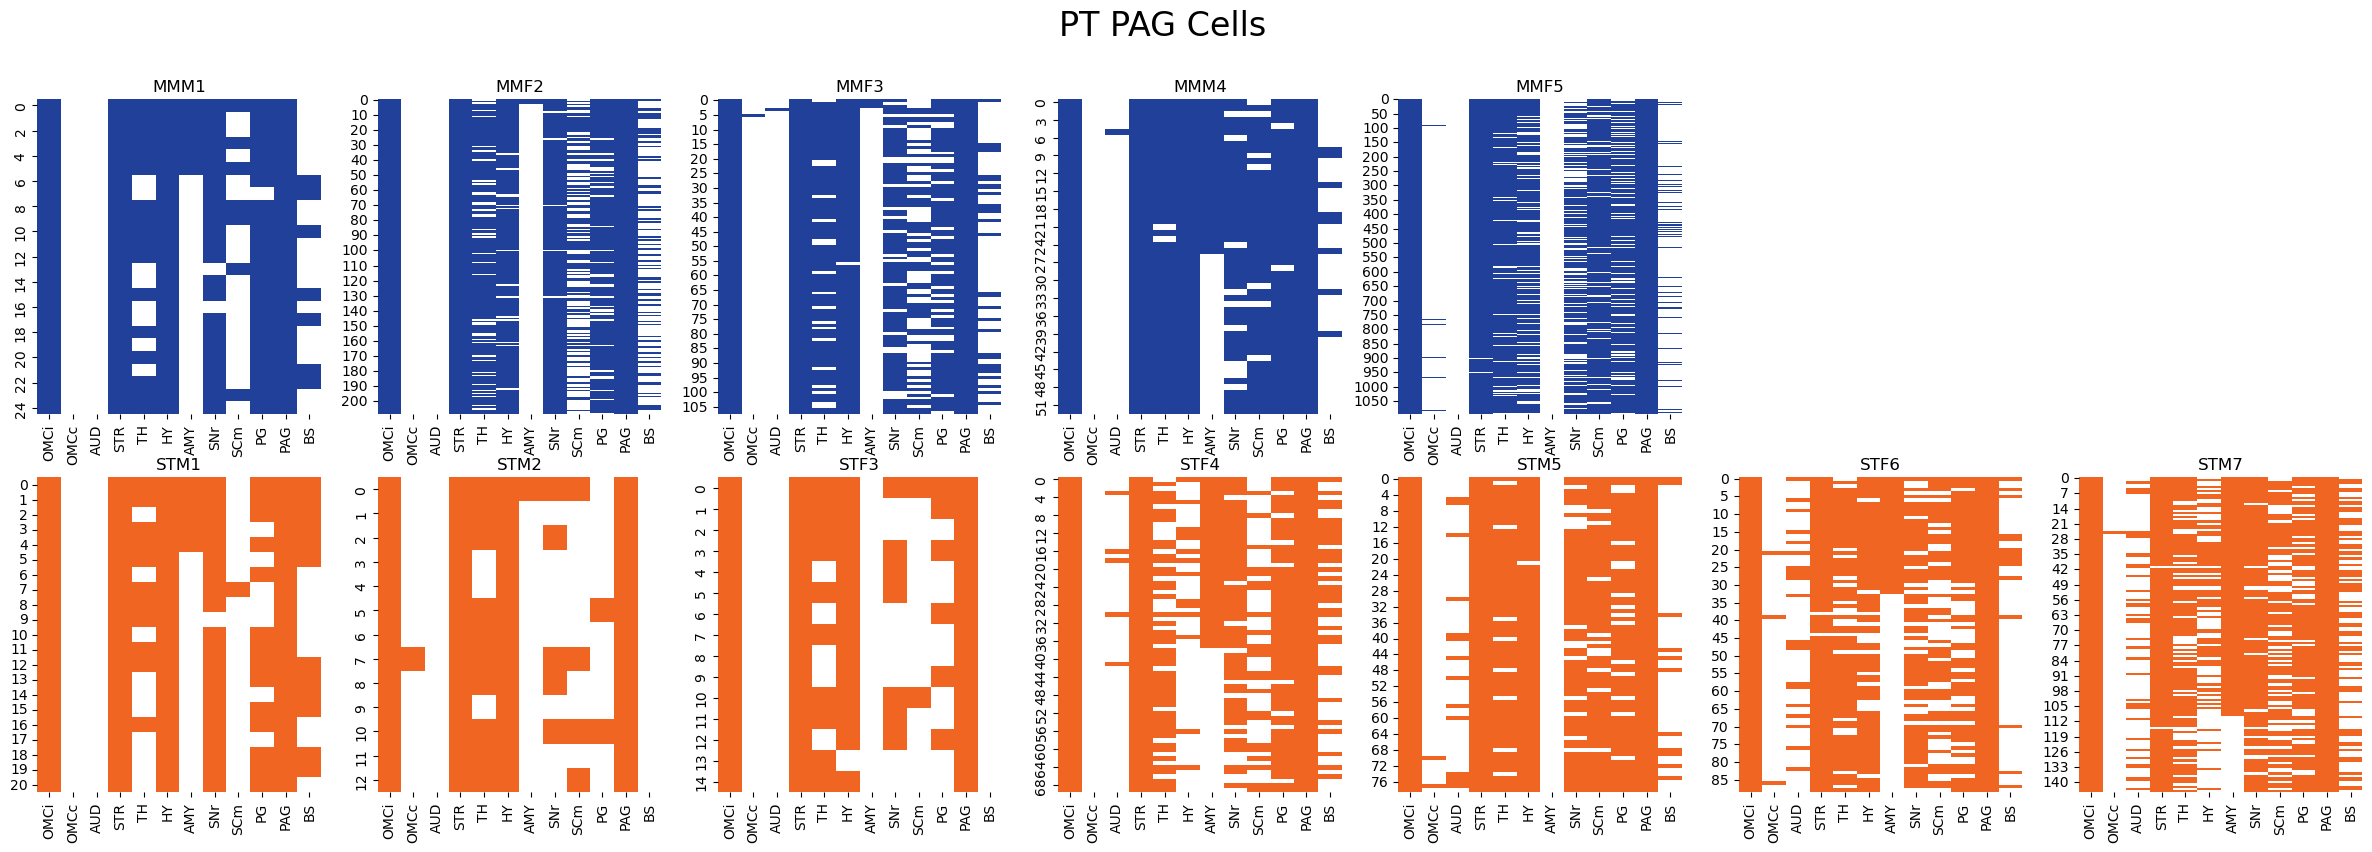

In [27]:
# heatmaps of PT PAG cells
fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        sns.heatmap(omc_pt_mm_pag[i], cmap=blue_cmp, cbar=False, ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        sns.heatmap(omc_pt_st_pag[j], cmap=orange_cmp, cbar=False, ax=ax)
        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("PT PAG Cells", size=24)




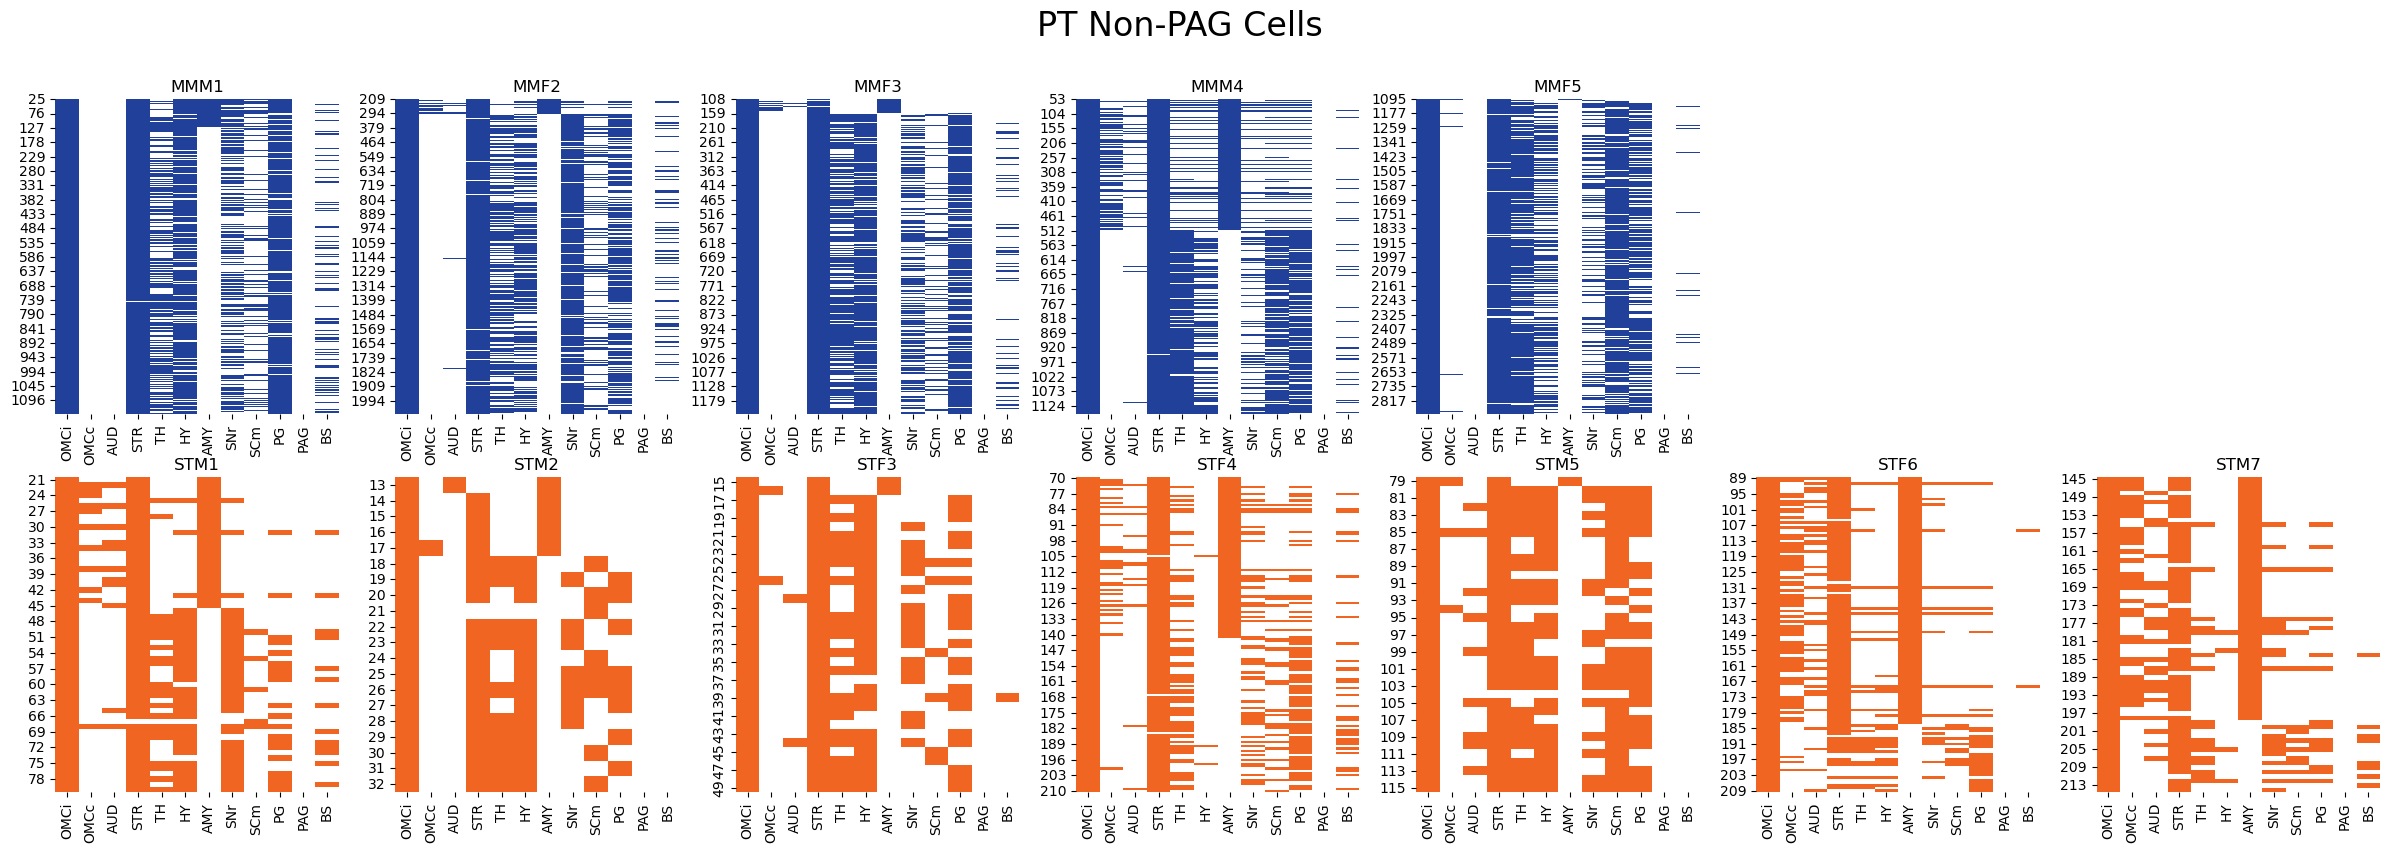

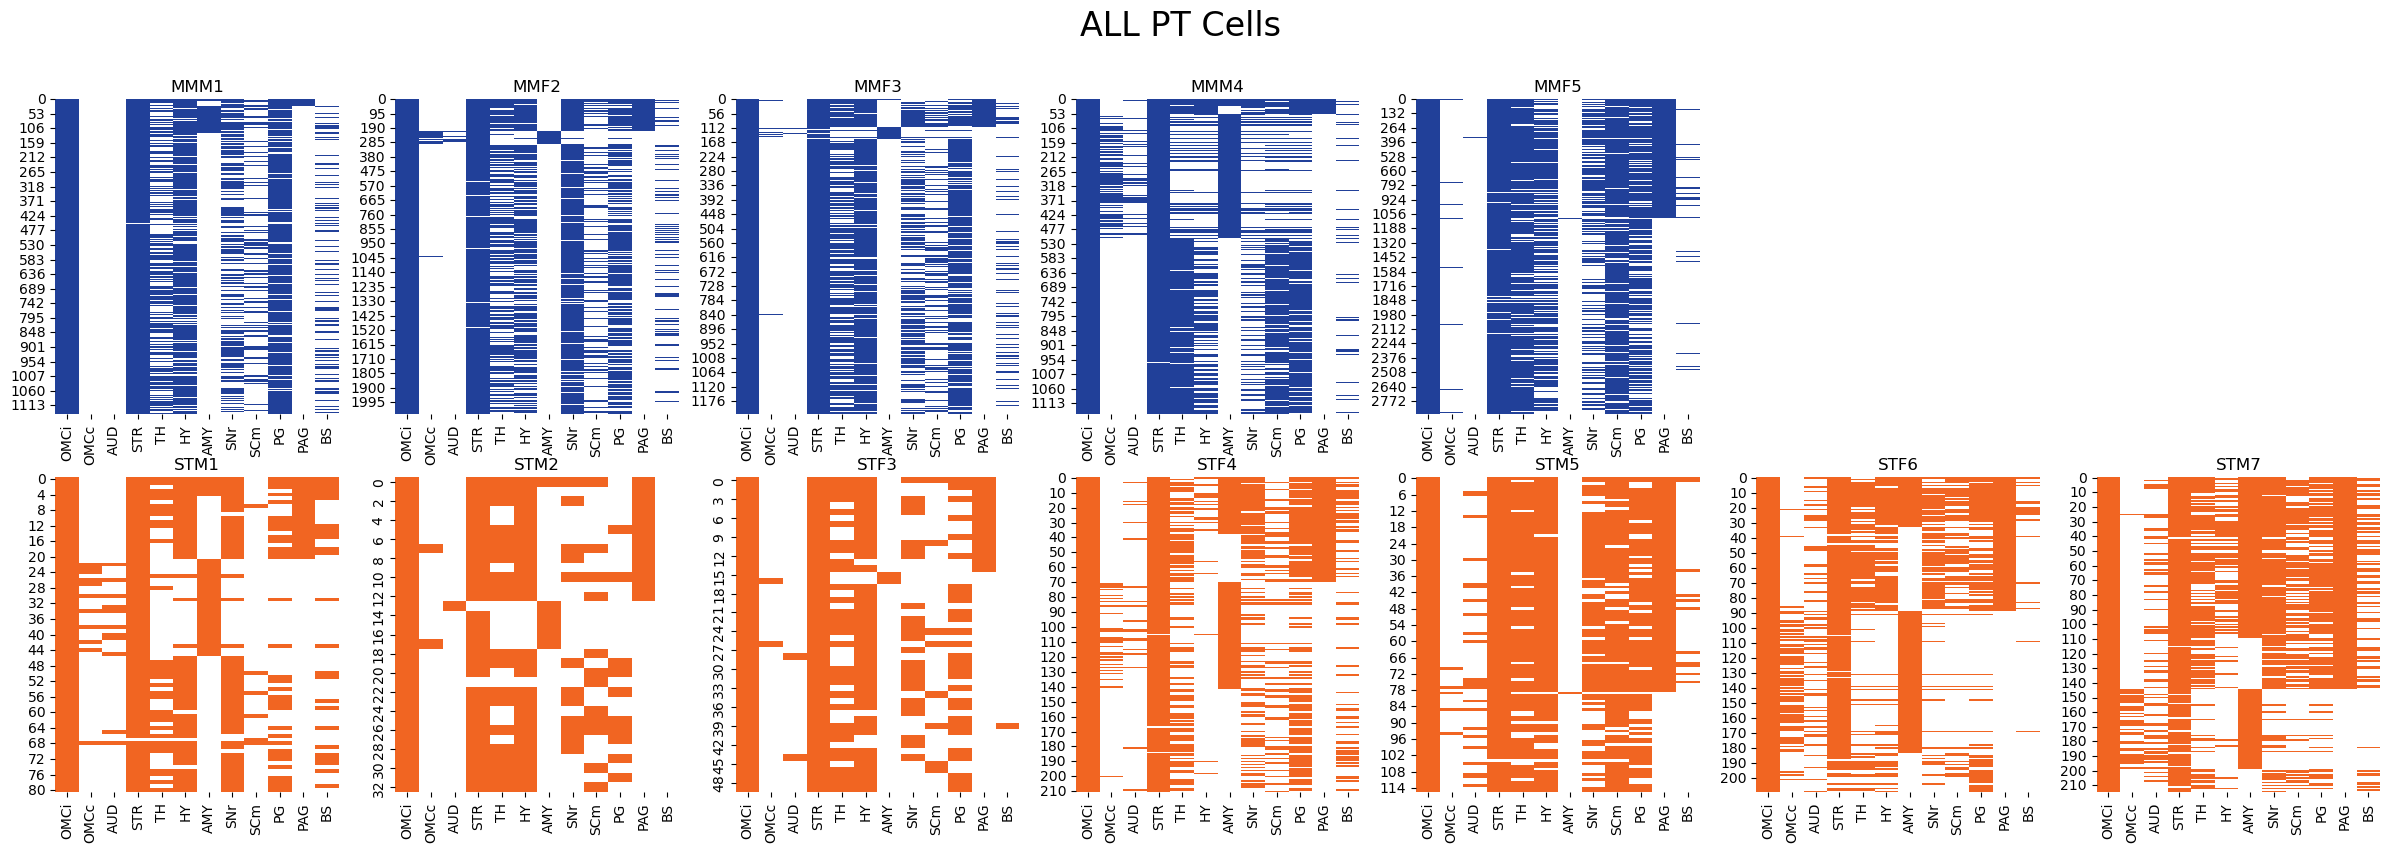

In [30]:
# heatmaps of PT PAG cells
fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        sns.heatmap(omc_pt_mm_npag[i], cmap=blue_cmp, cbar=False, ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        sns.heatmap(omc_pt_st_npag[j], cmap=orange_cmp, cbar=False, ax=ax)
        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("PT Non-PAG Cells", size=24)

plt.show()


fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        sns.heatmap(omc_pt_mm[i], cmap=blue_cmp, cbar=False, ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        sns.heatmap(omc_pt_st[j], cmap=orange_cmp, cbar=False, ax=ax)
        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("ALL PT Cells", size=24)

plt.show()


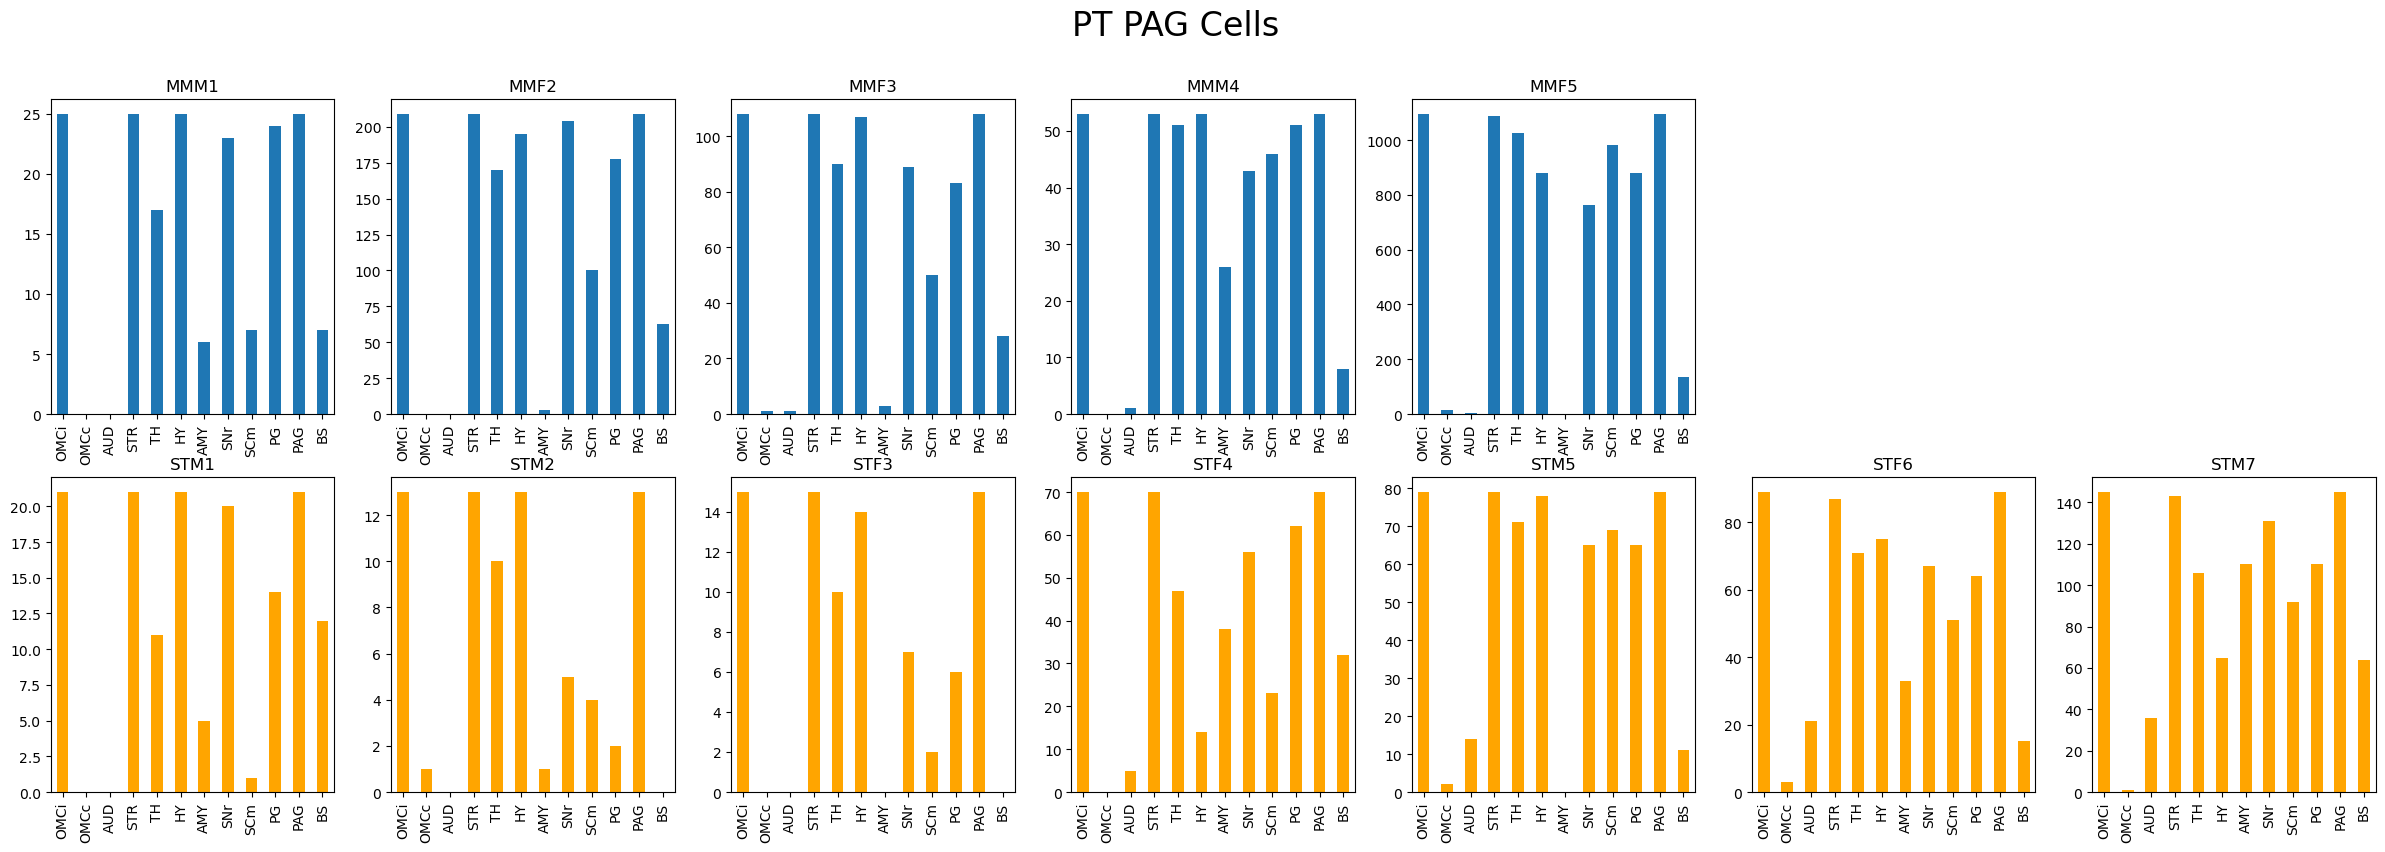

In [45]:
# PAG collatoral proportions
fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        df = omc_pt_mm_pag[i]
        df.sum().plot.bar(ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        df = omc_pt_st_pag[j]
        df.sum().plot.bar(ax=ax, color="orange")

        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("PT PAG Cells", size=24)

plt.show()


In [60]:
# dot_bar_plot dataframe

pag_mm_dfs = []
for i in range(len(mice_mm)):
    df = omc_pt_mm_pag[i]
    sums = df.sum()
    areas = sums.index.values
    counts = sums.values
    proportions = counts/df.shape[0]
    df_out = pd.DataFrame({'area':areas, 'counts':counts, 'proportion':proportions, 'mouse':mice_mm[i], 'species':'mmus', 'dataset':dataset_mm[i]})
    pag_mm_dfs.append(df_out)

pag_mm_df = pd.concat(pag_mm_dfs)

pag_st_dfs = []
for i in range(len(mice_st)):
    df = omc_pt_st_pag[i]
    sums = df.sum()
    areas = sums.index.values
    counts = sums.values
    proportions = counts/df.shape[0]
    df_out = pd.DataFrame({'area':areas, 'counts':counts, 'proportion':proportions, 'mouse':mice_st[i], 'species':'steg', 'dataset':dataset_st[i]})
    pag_st_dfs.append(df_out)

pag_st_df = pd.concat(pag_st_dfs)

pag_df = pd.concat([pag_mm_df, pag_st_df])
pag_df

,area,counts,proportion,mouse,species,dataset
0,OMCi,25.0,1.000000,MMM1,mmus,M194
1,OMCc,0.0,0.000000,MMM1,mmus,M194
2,AUD,0.0,0.000000,MMM1,mmus,M194
3,STR,25.0,1.000000,MMM1,mmus,M194
4,TH,17.0,0.680000,MMM1,mmus,M194
...,...,...,...,...,...,...
7,SNr,131.0,0.903448,STM7,steg,M220
8,SCm,92.0,0.634483,STM7,steg,M220
9,PG,110.0,0.758621,STM7,steg,M220
10,PAG,145.0,1.000000,STM7,steg,M220


Text(0.5, 1.0, 'PT PAG proportions')

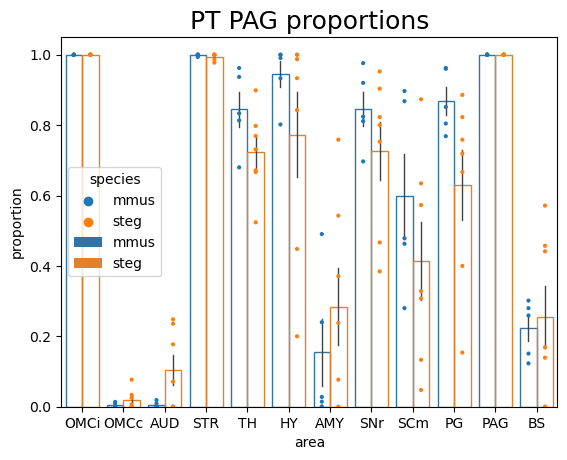

In [62]:
# dot_bar_plot

sns.stripplot(pag_df, x="area", y="proportion", hue="species", dodge=True, jitter=False, size=3)
t_ax = sns.barplot(pag_df, x="area", y="proportion", hue="species", errorbar="se", errwidth=1)
for patch in t_ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
    patch.set_facecolor((0,0,0,0))
plt.setp(t_ax.patches, linewidth=1)
plt.title("PT PAG proportions", size=18)

# SNr

MMus


1.0     0.002869
2.0     0.029309
3.0     0.066202
4.0     0.167452
5.0     0.263374
6.0     0.266448
7.0     0.170527
8.0     0.032384
9.0     0.001230
10.0    0.000205
dtype: float64



STeg


2.0     0.021359
3.0     0.033010
4.0     0.100971
5.0     0.141748
6.0     0.250485
7.0     0.233010
8.0     0.149515
9.0     0.062136
10.0    0.007767
dtype: float64

Text(0.5, 0.98, 'PT SNr')

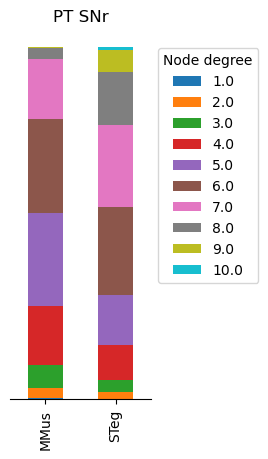

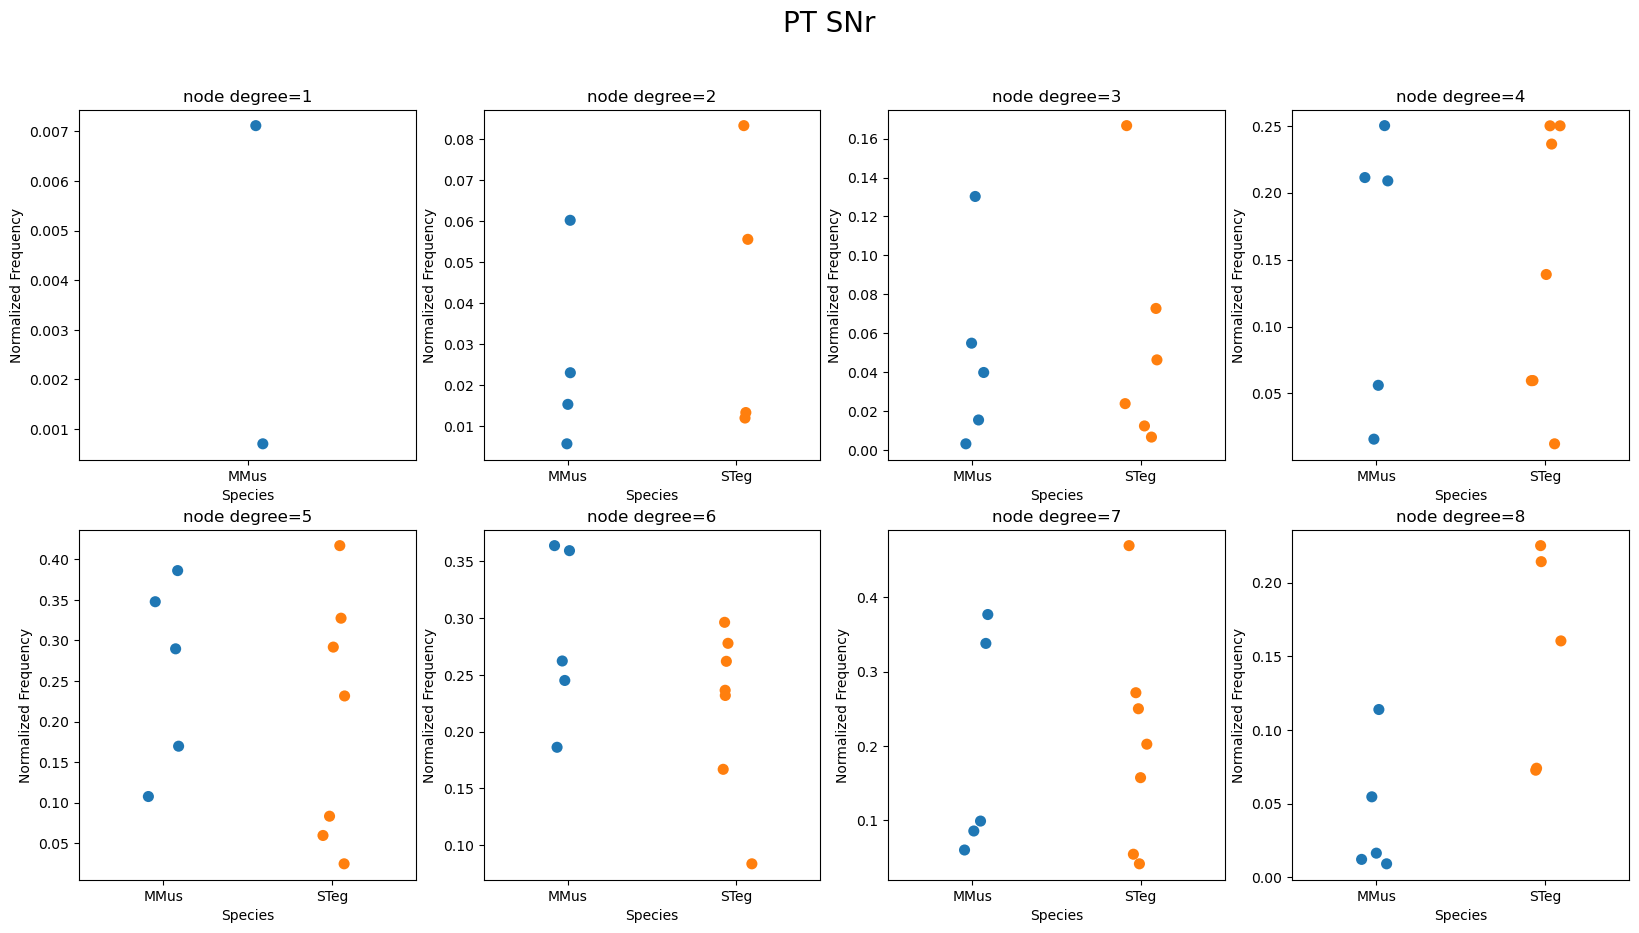

In [63]:
# SNr

# isolate snr cells
omc_pt_mm_snr = []
for i in range(len(omc_pt_mm)):
    df = omc_pt_mm[i]
    snr = df[df['SNr']>0]
    omc_pt_mm_snr.append(snr)

omc_pt_mm_snr_all = pd.concat(omc_pt_mm_snr)

omc_pt_st_snr = []
for i in range(len(omc_pt_st)):
    df = omc_pt_st[i]
    snr = df[df['SNr']>0]
    omc_pt_st_snr.append(snr)

omc_pt_st_snr_all = pd.concat(omc_pt_st_snr)


# calculate node degree
print("MMus")
node_proportion_mm = df_to_nodes(omc_pt_mm_snr_all, drop=['OMCi'])
display(node_proportion_mm)

print("\n")

print("STeg")
node_proportion_st = df_to_nodes(omc_pt_st_snr_all, drop=['OMCi'])
display(node_proportion_st)

plot_df = pd.DataFrame(columns=['MMus', 'STeg'])
# plot_df
plot_df['MMus'] = node_proportion_mm
plot_df['STeg'] = node_proportion_st
plot_df.transpose().plot(kind='bar', stacked=True)
plt.gca().get_yaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0, title="Node degree")
plt.gca().set_aspect(5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("PT SNr")
# plt.savefig(out_path+"mm_st_snr_nodestack.jpeg", dpi=300, bbox_inches="tight")


# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_pt_mm_snr, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_pt_st_snr, drop=['OMCi'], species='STeg')
nodes_pt = pd.concat([nodes_mm, nodes_st])
# nodes_pt

fig, axs = plt.subplots(2,4, figsize=(20,10))
i=1
for ax in axs.flat:
    plot = nodes_pt[nodes_pt["Node Degree"]==i]
    sns.stripplot(plot, x="Species", y="Normalized Frequency", hue="Species", 
                  ax=ax, legend=False, size=8)
    ax.set_title("node degree="+str(i))
    i+=1
fig.suptitle("PT SNr", size=20)
# plt.savefig(out_path+"mm_st_snr_nodedots.jpeg", dpi=300, bbox_inches="tight")

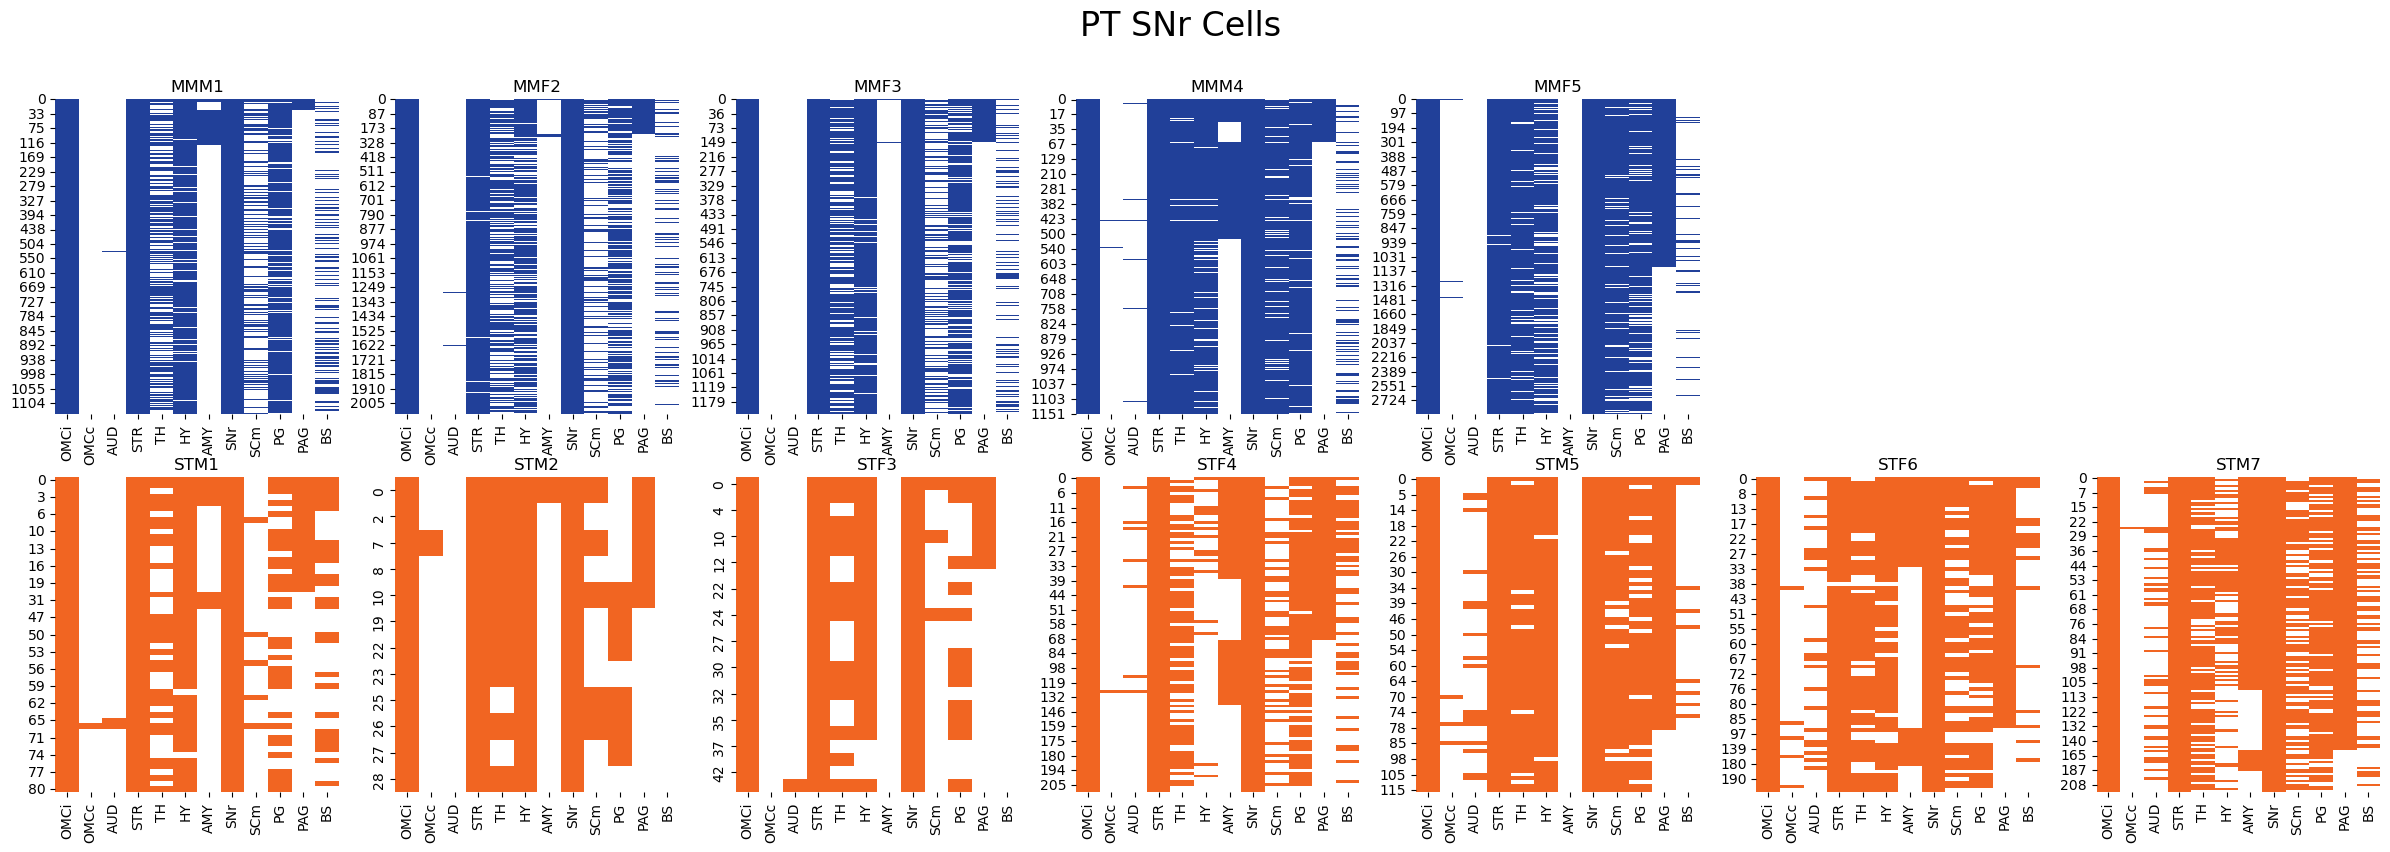

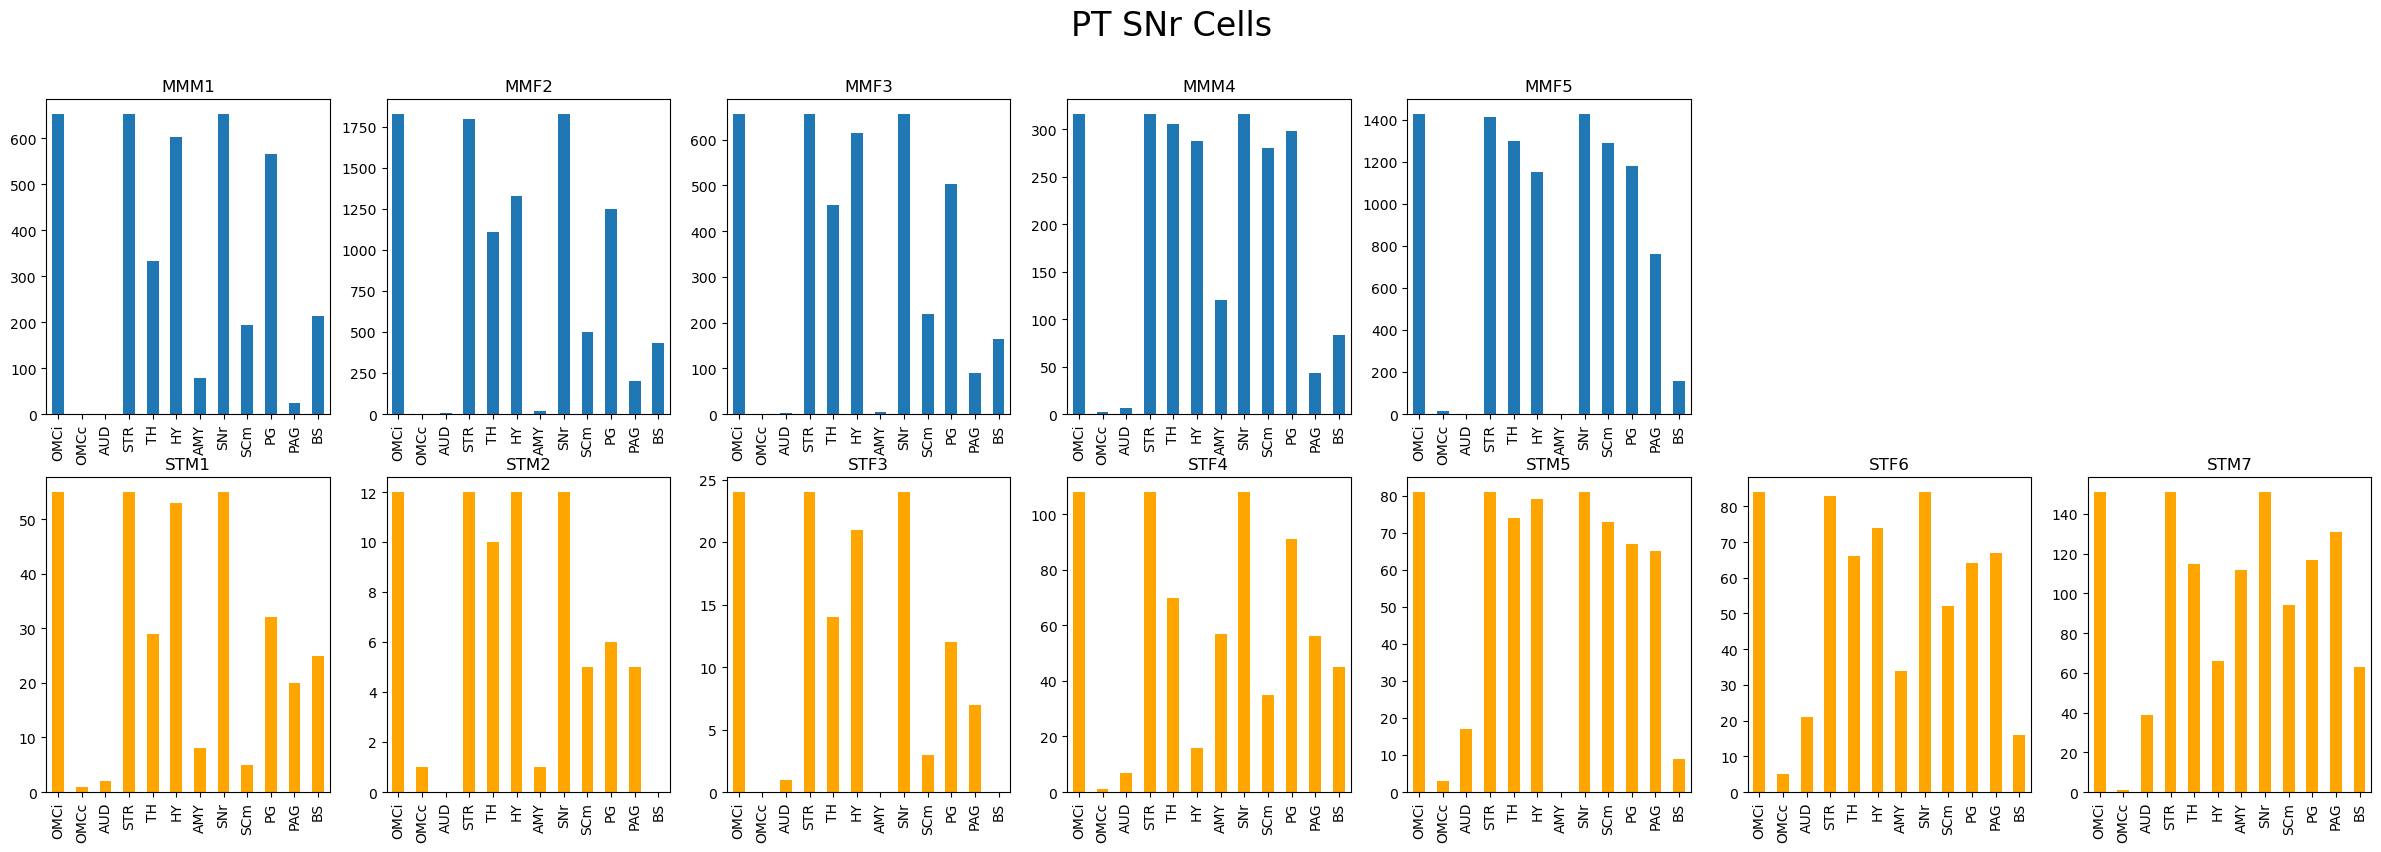

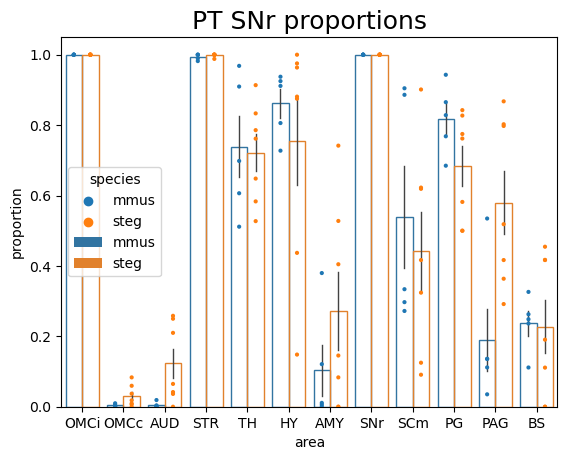

In [64]:
# heatmaps of PT SNr cells
fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        sns.heatmap(omc_pt_mm_snr[i], cmap=blue_cmp, cbar=False, ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        sns.heatmap(omc_pt_st_snr[j], cmap=orange_cmp, cbar=False, ax=ax)
        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("PT SNr Cells", size=24)

plt.show()


# SNr collatoral proportions
fig, axs = plt.subplots(2, 7, figsize=(30,9))

i=0
for ax in axs.flat:
    if i < 5:
        df = omc_pt_mm_snr[i]
        df.sum().plot.bar(ax=ax)
        ax.set_title(mice_mm[i])
    elif i >= 5 and i<7:
        ax.axis('off')
    else:
        j = i-7
        df = omc_pt_st_snr[j]
        df.sum().plot.bar(ax=ax, color="orange")

        ax.set_title(mice_st[j])
    i+=1

plt.suptitle("PT SNr Cells", size=24)

plt.show()


# dot_bar_plot dataframe

snr_mm_dfs = []
for i in range(len(mice_mm)):
    df = omc_pt_mm_snr[i]
    sums = df.sum()
    areas = sums.index.values
    counts = sums.values
    proportions = counts/df.shape[0]
    df_out = pd.DataFrame({'area':areas, 'counts':counts, 'proportion':proportions, 'mouse':mice_mm[i], 'species':'mmus', 'dataset':dataset_mm[i]})
    snr_mm_dfs.append(df_out)

snr_mm_df = pd.concat(snr_mm_dfs)

snr_st_dfs = []
for i in range(len(mice_st)):
    df = omc_pt_st_snr[i]
    sums = df.sum()
    areas = sums.index.values
    counts = sums.values
    proportions = counts/df.shape[0]
    df_out = pd.DataFrame({'area':areas, 'counts':counts, 'proportion':proportions, 'mouse':mice_st[i], 'species':'steg', 'dataset':dataset_st[i]})
    snr_st_dfs.append(df_out)

snr_st_df = pd.concat(snr_st_dfs)

snr_df = pd.concat([snr_mm_df, snr_st_df])
snr_df


# dot_bar_plot

sns.stripplot(snr_df, x="area", y="proportion", hue="species", dodge=True, jitter=False, size=3)
t_ax = sns.barplot(snr_df, x="area", y="proportion", hue="species", errorbar="se", errwidth=1)
for patch in t_ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
    patch.set_facecolor((0,0,0,0))
plt.setp(t_ax.patches, linewidth=1)
plt.title("PT SNr proportions", size=18)

plt.show()



# label individual mice

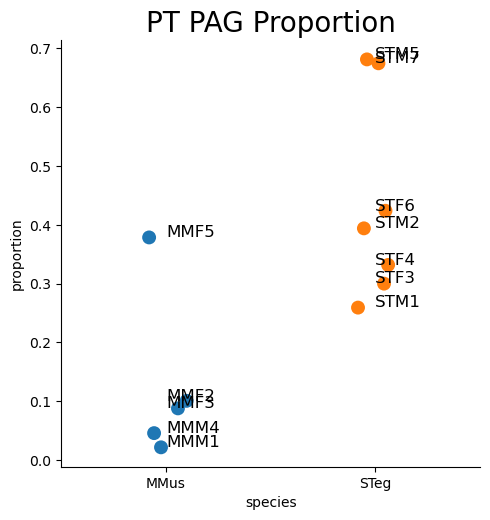

In [76]:
plot = pd.DataFrame(columns=['count', 'pt_total', 'proportion', 'mice', 'species', 'dataset'])

for i in range(num_samples):
    df = omc_pt[i]
    count = df.sum()['PAG']
    total = df.shape[0]
    proportion = count/total
    plot.loc[len(plot.index)] = [count, total, proportion, mice[i], species[i], dataset[i]]

sns.catplot(data=plot, x="species", y="proportion", hue="species", size=10)
plt.title('PT PAG Proportion', size=20)
#     ax.set_ylim(-0.1,1.1)
for j in range(plot.shape[0]):
    if plot.species[j]=="MMus":
        k=0
    else:
        k=1
    plt.text(x=k,y=plot.proportion[j]+0.001,s=plot.mice[j], 
          fontdict=dict(color='black', size=12))


Text(0.5, 0.98, 'PT PAG')

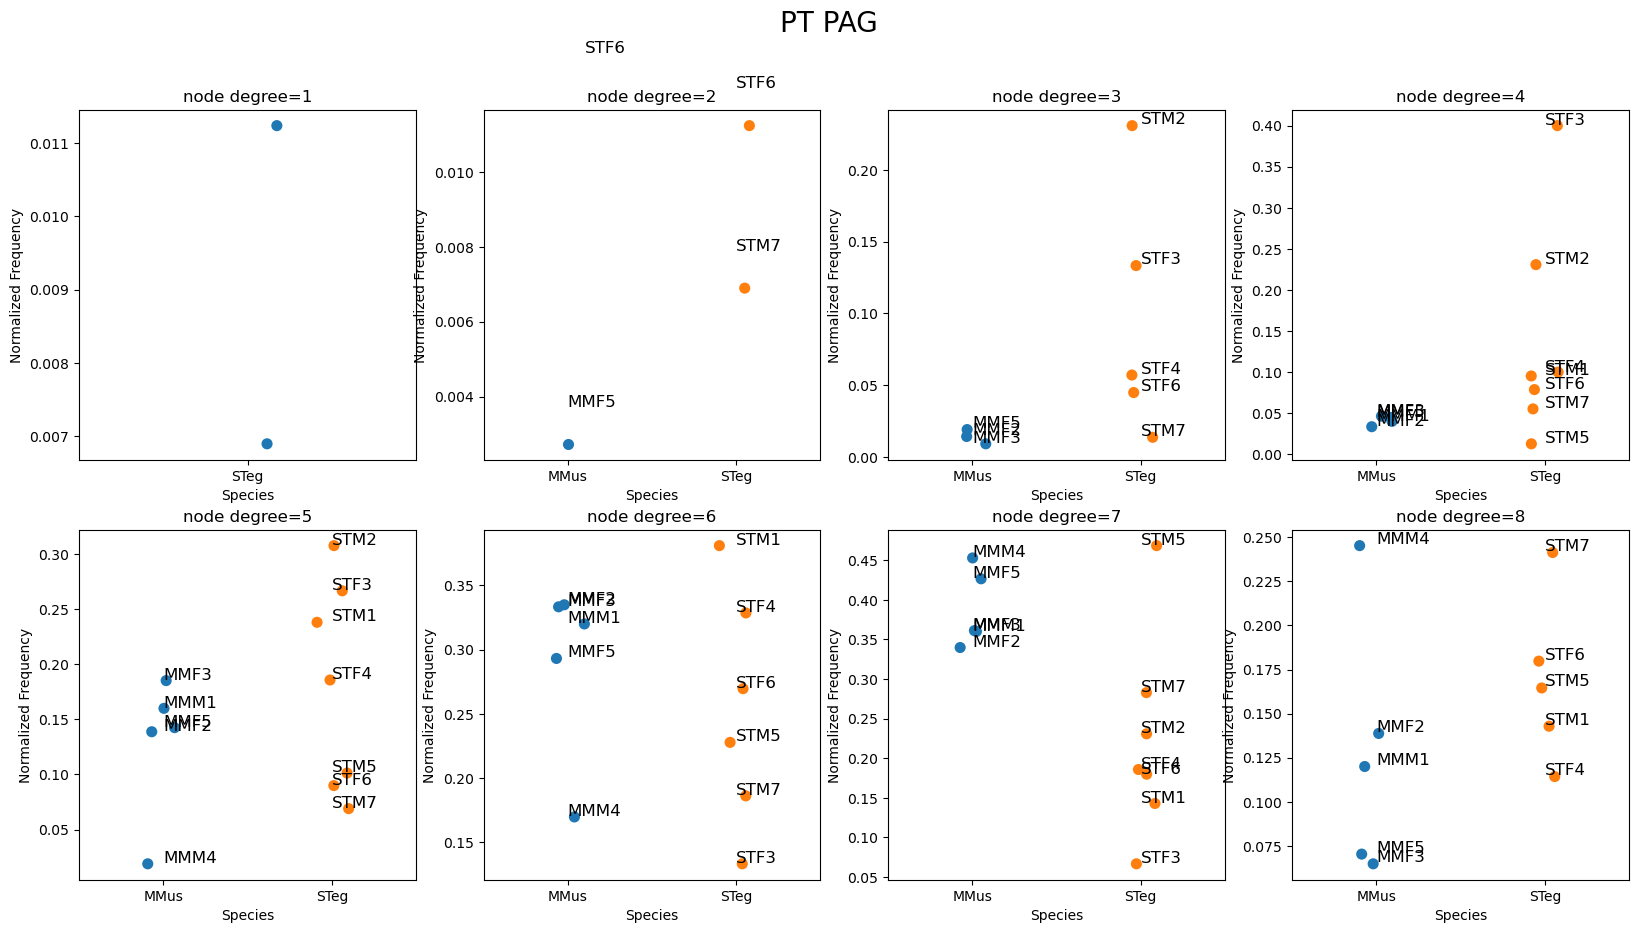

In [93]:
# node 1 for each individual species
nodes_mm = df_list_to_nodes(omc_pt_mm_pag, drop=['OMCi'], species='MMus')
nodes_st = df_list_to_nodes(omc_pt_st_pag, drop=['OMCi'], species='STeg')
nodes_pt = pd.concat([nodes_mm, nodes_st])
# nodes_pt

fig, axs = plt.subplots(2,4, figsize=(20,10))
i=1
for ax in axs.flat:
    plot = nodes_pt[nodes_pt["Node Degree"]==i].reset_index(drop=True)
    sns.stripplot(plot, x="Species", y="Normalized Frequency", hue="Species", 
                  ax=ax, legend=False, size=8)
    ax.set_title("node degree="+str(i))

    for j in range(plot.shape[0]):
        if plot.Species[j]=="MMus":
            k=0
        else:
            k=1
        ax.text(x=k,y=plot['Normalized Frequency'][j]+0.001,s=plot.mouse[j], 
            fontdict=dict(color='black', size=12))


    i+=1
fig.suptitle("PT PAG", size=20)
# plt.savefig(out_path+"mm_st_pag_nodedots.jpeg", dpi=300, bbox_inches="tight")